In [1]:
import pandas as pd

df = pd.read_csv("Flipkart Mobile - 2.csv")
df['sales_price'] = df['sales_price'].astype(str).str.replace('₹', '').str.replace(',', '').astype(float)
df['ratings'] = df['ratings'].astype(str).str.replace('★', '').astype(str).str.replace
df['ratings'] = df['ratings'].fillna(0)
df.drop_duplicates(inplace=True)

print(df.head())


   brand           model base_color processor screen_size  ROM  RAM  \
0  Apple       iPhone SE      Black     Water  Very Small   64    2   
1  Apple  iPhone 12 Mini        Red   Ceramic       Small   64    4   
2  Apple       iPhone SE        Red     Water  Very Small   64    2   
3  Apple       iPhone XR     Others       iOS      Medium   64    3   
4  Apple       iPhone 12        Red   Ceramic      Medium  128    4   

   display_size  num_rear_camera  num_front_camera  battery_capacity  \
0           4.7                1                 1              1800   
1           5.4                2                 1              2815   
2           4.7                1                 1              1800   
3           6.1                1                 1              2942   
4           6.1                2                 1              2815   

                                             ratings  num_of_ratings  \
0  <bound method StringMethods.replace of <pandas...           38645

In [2]:
# 1. Check basic structure of the dataset
print("Shape of dataset:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nFirst 5 rows:\n", df.head())

# 2. Summary statistics
print("\nSummary stats:\n", df.describe())

# 3. Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# 4. Unique brands
print("\nTop 10 brands:\n", df['Brand'].value_counts().head(10))

# 5. Average price of all phones
print("\nAverage price:", df['Price'].mean())

# 6. Phones with highest rating
print("\nTop 5 rated phones:\n", df.sort_values(by='Rating', ascending=False).head(5))

# 7. Price distribution of all phones
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title("Price Distribution of Mobiles")
plt.xlabel("Price (₹)")
plt.ylabel("Number of Phones")
plt.show()


Shape of dataset: (430, 16)

Data types:
 brand                object
model                object
base_color           object
processor            object
screen_size          object
ROM                   int64
RAM                   int64
display_size        float64
num_rear_camera       int64
num_front_camera      int64
battery_capacity      int64
ratings              object
num_of_ratings        int64
sales_price         float64
discount_percent    float64
sales               float64
dtype: object

First 5 rows:
    brand           model base_color processor screen_size  ROM  RAM  \
0  Apple       iPhone SE      Black     Water  Very Small   64    2   
1  Apple  iPhone 12 Mini        Red   Ceramic       Small   64    4   
2  Apple       iPhone SE        Red     Water  Very Small   64    2   
3  Apple       iPhone XR     Others       iOS      Medium   64    3   
4  Apple       iPhone 12        Red   Ceramic      Medium  128    4   

   display_size  num_rear_camera  num_front_camera  b

KeyError: 'Brand'

In [3]:
# 1. Add a 'Brand' column if not already present
df['Brand'] = df['model'].str.split().str[0]

# 2. Top 5 most listed brands
top_brands = df['Brand'].value_counts().head(5)
print("Top 5 most listed brands:\n", top_brands)

# 3. Average price per brand
avg_price = df.groupby('Brand')['sales_price'].mean().sort_values(ascending=False)
print("\nAverage sales_price per Brand:\n", avg_price.head(10))

# 4. Average rating per brand
df['ratings'] = pd.to_numeric(df['ratings'], errors='coerce')
avg_ratings = df.groupby('Brand')['ratings'].mean().sort_values(ascending=False)
print("\nAverage ratings per Brand:\n", avg_ratings.head(10))

# 5. Best phones under ₹10,000 with rating > 4.2
best_budget = df[(df['sales_price'] <= 10000) & (df['ratings'] >= 4.2)].sort_values(by='ratings', ascending=False)
print("\nBest Budget Phones (Under ₹10K with ratings > 4.2):\n", best_budget[['Brand', 'sales_price', 'ratings']].head(5))

# 6. Number of phones in each price range
bins = [0, 5000, 10000, 15000, 20000, 30000, 50000]
labels = ['<5K', '5K-10K', '10K-15K', '15K-20K', '20K-30K', '30K-50K']
df['sales_price'] = pd.cut(df['sales_price'], bins=bins, labels=labels)
print("\nPhones in each price range:\n", df['sales_price'].value_counts())


Top 5 most listed brands:
 Galaxy    117
iPhone     56
Redmi      41
Narzo      31
X3         21
Name: Brand, dtype: int64

Average sales_price per Brand:
 Brand
iPhone    57748.107143
GT        30832.333333
Galaxy    29149.000000
F3        28999.000000
X7        26374.000000
Mi        25714.500000
X3        22951.380952
F1        20499.000000
7         19199.000000
8s        17999.000000
Name: sales_price, dtype: float64

Average ratings per Brand:
 Brand
3i    NaN
5     NaN
6     NaN
6i    NaN
7     NaN
8     NaN
8s    NaN
C11   NaN
C12   NaN
C15   NaN
Name: ratings, dtype: float64

Best Budget Phones (Under ₹10K with ratings > 4.2):
 Empty DataFrame
Columns: [Brand, sales_price, ratings]
Index: []

Phones in each price range:
 10K-15K    116
15K-20K     75
20K-30K     72
5K-10K      67
30K-50K     51
<5K          0
Name: sales_price, dtype: int64


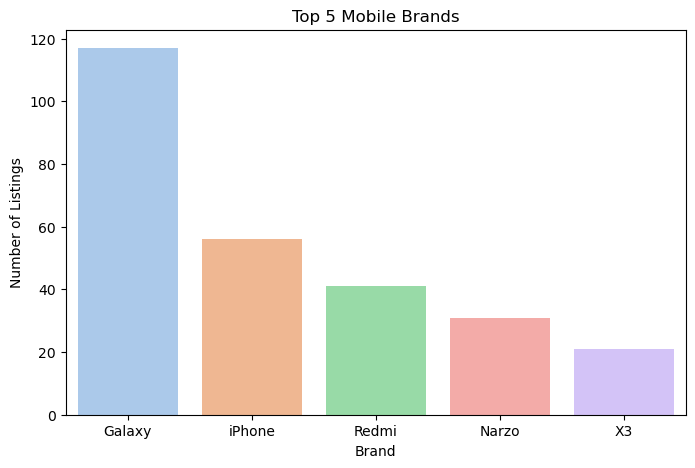

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

top_brands = df['Brand'].value_counts().head(5)

plt.figure(figsize=(8,5))
sns.barplot(x=top_brands.index, y=top_brands.values, palette='pastel')
plt.title('Top 5 Mobile Brands')
plt.xlabel('Brand')
plt.ylabel('Number of Listings')
plt.show()


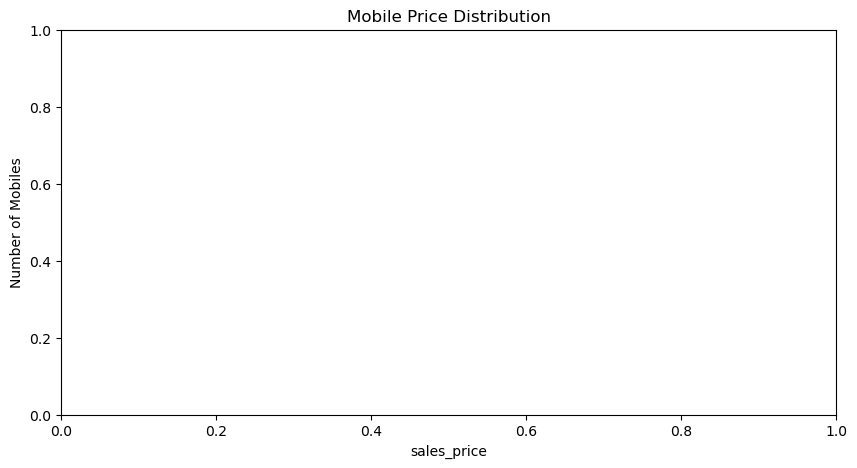

In [18]:
# Ensure Price is numeric
df['sales_price'] = pd.to_numeric(df['sales_price'], errors='coerce')
df = df.dropna(subset=['sales_price'])  # Drop rows where price couldn't be converted

# Now plot
plt.figure(figsize=(10,5))
sns.histplot(df['sales_price'], bins=30, kde=True, color='skyblue')
plt.title('Mobile Price Distribution')
plt.xlabel('sales_price')
plt.ylabel('Number of Mobiles')
plt.show()


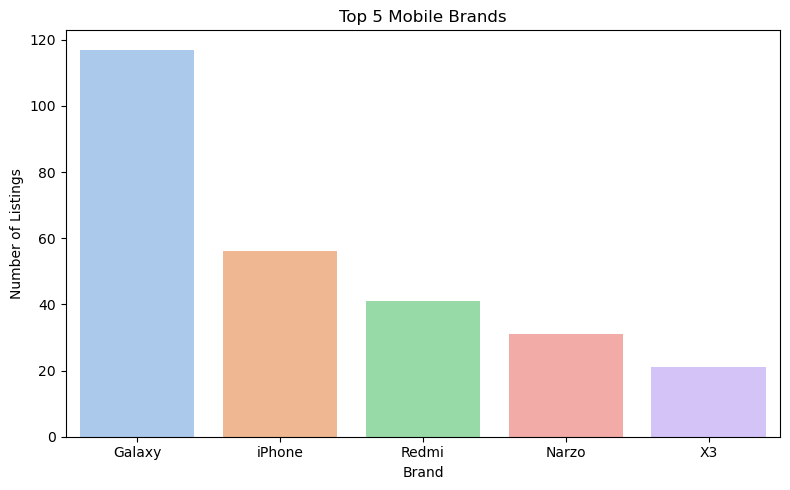

In [11]:
import matplotlib.pyplot as plt # bar chart
import seaborn as sns

# Count top 5 brands from 'Brand' column
top_brands = df['Brand'].value_counts().head(5)

# Plotting
plt.figure(figsize=(8,5))
sns.barplot(x=top_brands.index, y=top_brands.values, palette='pastel')
plt.title('Top 5 Mobile Brands')
plt.xlabel('Brand')
plt.ylabel('Number of Listings')
plt.tight_layout()
plt.show()



In [17]:
print(df['sales_price'].dtype) # check price column


float64


In [20]:
df['sales_price'] = pd.to_numeric(df['sales_price'], errors='coerce') # male price column numeric


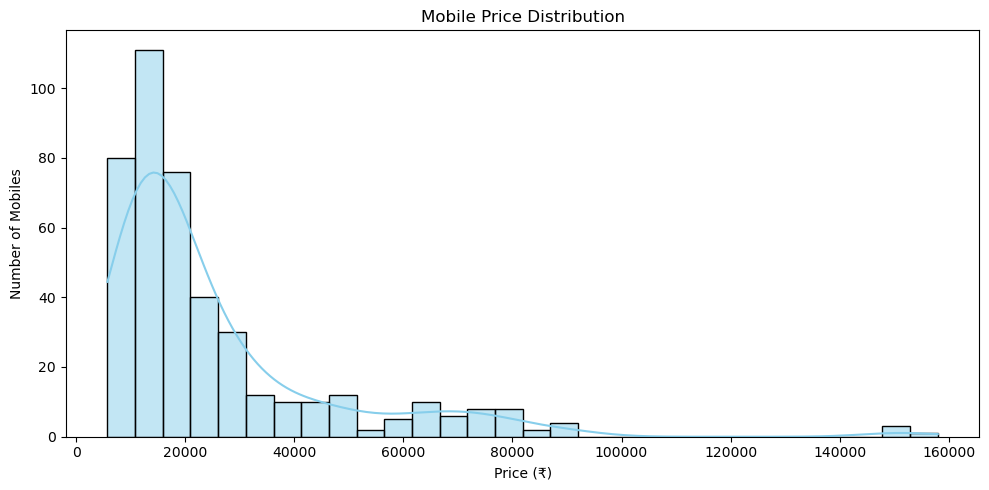

In [24]:
import pandas as pd # histogram
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the CSV
df = pd.read_csv("Flipkart Mobile - 2.csv")

# Step 2: Clean 'sales_price' column
df['sales_price'] = df['sales_price'].astype(str).str.replace('₹', '').str.replace(',', '')
df['sales_price'] = pd.to_numeric(df['sales_price'], errors='coerce')

# Step 3: Drop rows where price is missing
df = df.dropna(subset=['sales_price'])

# Step 4: Plot the histogram
plt.figure(figsize=(10,5))
sns.histplot(df['sales_price'], bins=30, kde=True, color='skyblue')
plt.title('Mobile Price Distribution')
plt.xlabel('Price (₹)')
plt.ylabel('Number of Mobiles')
plt.tight_layout()
plt.show()
